In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
base = pd.read_excel(r'E:\Documentos\bases\indice_conectar\receita\receita.xlsx', 
                             sheet_name='Sheet1', dtype={'COD': str})

## Análise

In [3]:
base

,COD,rc_2017,rc_2018,rc_2019,rc_2020
0,1100015,"55,665,051.14","54,026,500.99","61,367,641.95","66,101,141.38"
1,1100023,"201,251,614.94","234,885,066.35","269,626,934.67","316,592,864.44"
2,1100031,"18,096,415.97","21,538,698.00","22,265,242.82","24,556,925.99"
3,1100049,"161,157,784.24","175,469,350.72","199,074,608.19","35,070,832.91"
4,1100056,"39,224,568.15","43,667,803.47","48,183,441.66","52,721,162.93"
...,...,...,...,...,...
5561,5221908,"13,373,856.55","14,051,261.30","14,808,688.26","17,036,092.14"
5562,5222005,"37,506,685.10","51,345,281.14","60,197,870.05","64,352,723.00"
5563,5222054,"29,489,144.06","33,656,002.97","45,481,597.75","51,963,122.89"
5564,5222203,"19,158,837.42","18,160,183.59","18,860,562.54","23,752,643.67"


In [4]:
print('Quantidade de municipios na base de dados: {0}'.format(len(base)))
print('Quantidade de municípios que não estão na base: {0}'.format(5568 - len(base)))

Quantidade de municipios na base de dados: 5566
Quantidade de municípios que não estão na base: 2


In [5]:
print('Quantidade de municipios sem valor(zero) para cada ano')
print(base[['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']].isna().sum())

Quantidade de municipios sem valor(zero) para cada ano
rc_2017     16
rc_2018     38
rc_2019     15
rc_2020    150
dtype: int64


In [6]:
#Municipios com somente um valor
base[base[['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']].isna().sum(axis=1) >= 3]

,COD,rc_2017,rc_2018,rc_2019,rc_2020
1117,2404002,nan,nan,"14,688,025.15",nan
1187,2410504,nan,nan,"13,221,111.54",nan
1654,2700805,nan,nan,"24,177,657.67",nan
1677,2702801,nan,nan,"37,779,733.85",nan
5293,5107701,nan,nan,"40,960,354.63",nan
5483,5214903,"15,262,237.90",nan,nan,nan


In [7]:
#Municipios com valores negativos
base.sort_values('rc_2020').head(10)

,COD,rc_2017,rc_2018,rc_2019,rc_2020
4307,4128807,"18,200,030.74","18,912,830.19","20,209,904.34","-49,677,127.52"
1582,2610608,"89,335,085.26","99,224,861.77","115,057,156.14","-5,747,670.89"
17,1100254,"38,413,102.98","43,092,728.53","45,020,655.10","-3,580,716.10"
1607,2612703,"27,222,163.79","29,530,430.73","1,592,177.89","-3,532,862.61"
1498,2603405,"17,156,827.75","21,129,987.49","-1,740,210.97","-1,414,111.09"
5225,5103957,"14,531,989.77","15,279,080.99","16,517,864.10","-1,205,344.45"
5449,5212055,"10,710,565.58","12,149,190.98","13,832,734.58","-1,185,157.07"
3001,3164803,"9,358,635.91","9,959,869.62","11,439,995.23","-103,390.29"
4221,4122602,"26,215,148.25","23,292,116.23","27,852,823.02",0.00
5309,5108105,"13,878,130.73","16,233,162.50","17,900,474.48","59,340.60"


In [8]:
#Municipios com muita variação nos dados - 20 primeiros
base['cv'] = (base[['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']].std(axis=1)) / (base[['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']].mean(axis=1))
variação = base.sort_values('cv', ascending=False)

In [9]:
len(variação[variação['cv'] > 0.4])

138

In [10]:
base.describe()

,rc_2017,rc_2018,rc_2019,rc_2020,cv
count,"5,550.00","5,528.00","5,551.00","5,416.00","5,560.00"
mean,"100,170,915.79","108,105,300.83","118,603,992.67","130,940,688.36",0.15
std,"771,381,891.96","807,735,836.90","892,765,202.97","972,849,042.15",0.26
min,0.00,0.00,"-7,168,326.16","-49,677,127.52",0.01
25%,"16,603,212.92","18,259,402.49","19,993,046.84","21,747,207.41",0.10
50%,"28,948,242.52","31,368,882.68","34,295,485.77","37,847,488.47",0.13
75%,"58,737,159.23","64,506,692.28","70,533,346.38","79,553,533.40",0.16
max,"48,727,830,548.39","50,370,870,845.84","56,147,208,444.52","60,974,839,189.29",18.00


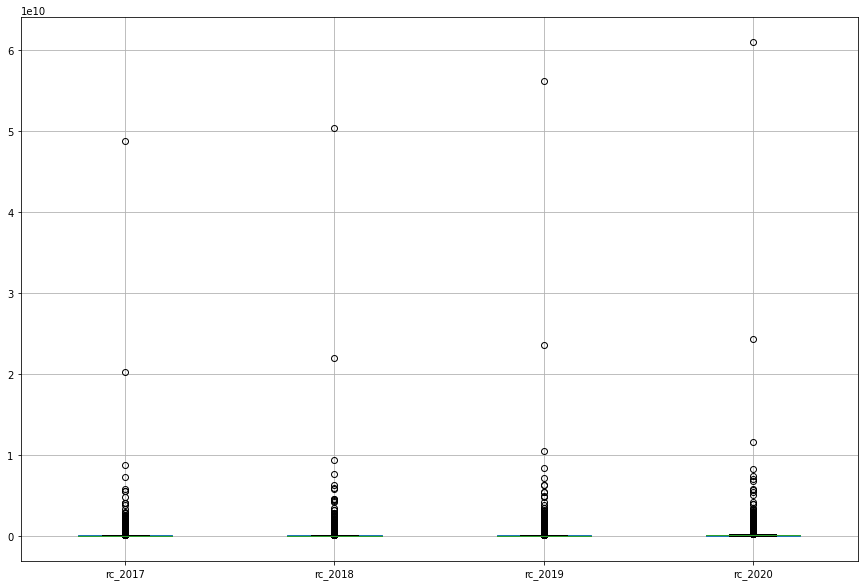

In [11]:
base[['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']].boxplot(figsize=(15, 10));

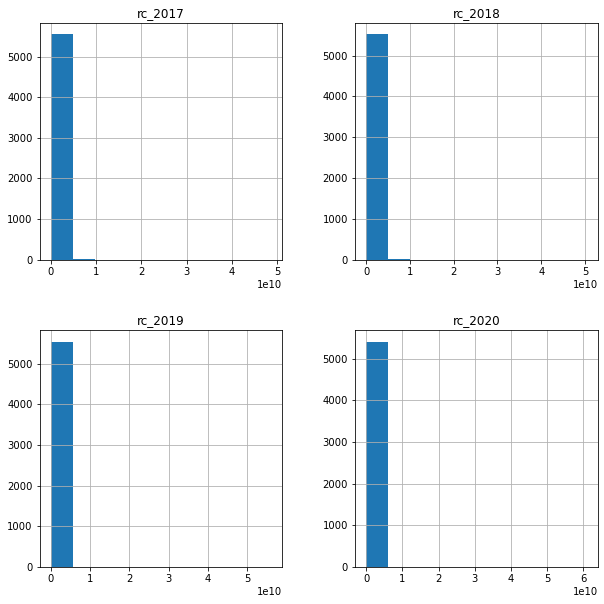

In [12]:
base[['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']].hist(figsize=(10, 10));

## 1. Tratamento
### T: revisa negativos (=0), acrescenta inflação, calcula razão

In [13]:
receita = base.copy()

In [14]:
#Revisar se valor for menor que 1, então considera nulo
def revisar_negativos(x):
    if x <= 1:
        x = np.nan
    else:
        x = x
    return x

In [16]:
#Aplicar a revisão
colunas = ['rc_2017', 'rc_2018', 'rc_2019', 'rc_2020']

for coluna in colunas:
    receita[coluna] = receita[coluna].apply(lambda x: revisar_negativos(x))

In [17]:
## INDICE
indice = pd.read_excel(r'E:\Documentos\bases\indice_conectar\inflação\tabela1737.xlsx', sheet_name='base')

In [18]:
#Criando a tabela com o indice de atualização
indice_ano = indice[['ano', 'número-indice']].groupby('ano').agg(media_ano = pd.NamedAgg('número-indice', 'mean')).reset_index()
indice_ano.set_index('ano', inplace=True)
referencia = indice_ano.loc[2020,'media_ano']
indice_ano['indice'] = referencia / indice_ano['media_ano']

#criando a variável de atualização
indice_2017 = indice_ano.loc[2017, 'indice']
indice_2018 = indice_ano.loc[2018, 'indice']
indice_2019 = indice_ano.loc[2019, 'indice']
indice_2020 = indice_ano.loc[2020, 'indice']

In [19]:
indice_ano

,media_ano,indice
ano,,
2017,"4,848.31",1.11
2018,"5,025.99",1.07
2019,"5,213.61",1.03
2020,"5,381.06",1.00


In [20]:
#Aplicando o indice às receitas
receita['rc_2017_atual'] = receita['rc_2017'] * indice_2017
receita['rc_2018_atual'] = receita['rc_2018'] * indice_2018
receita['rc_2019_atual'] = receita['rc_2019'] * indice_2019
receita['rc_2020_atual'] = receita['rc_2020'] * indice_2020

In [21]:
##POPULAÇÃO

#Carregando a planilha
populacao = pd.read_excel(r'E:\Documentos\bases\indice_conectar\população\população_base.xlsx', dtype={'COD': str})

#Fazendo o merge
aux_indice = pd.merge(populacao[['COD', 'NOME DO MUNICÍPIO', 'pop_2017', 'pop_2018', 'pop_2019', 'pop_2020', 'categoria', 'UF']], 
                    receita[['COD', 'rc_2017_atual', 'rc_2018_atual', 'rc_2019_atual', 'rc_2020_atual',]], 
                   on='COD', how='left')

In [22]:
#Criando a razão receita/população
aux_indice['rc-pc_2017'] = aux_indice['rc_2017_atual'] / aux_indice['pop_2017']
aux_indice['rc-pc_2018'] = aux_indice['rc_2018_atual'] / aux_indice['pop_2018']
aux_indice['rc-pc_2019'] = aux_indice['rc_2019_atual'] / aux_indice['pop_2019']
aux_indice['rc-pc_2020'] = aux_indice['rc_2020_atual'] / aux_indice['pop_2020']

In [23]:
#Fazendo a média da razão - considera apenas os anos que possuem valores
aux_indice['rc-pc_media'] = aux_indice[['rc-pc_2017' , 'rc-pc_2018', 'rc-pc_2019', 'rc-pc_2020']].mean(axis=1, skipna=True)

In [24]:
aux_indice.sample(20)

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media
981,2306603,Itatira,20675,20786,21647,21836,7,CE,"77,990,923.58","63,895,790.92","66,263,902.88","70,932,491.44","3,772.23","3,073.98","3,061.11","3,248.42","3,288.94"
788,2205904,Manoel Emídio,5266,5348,5349,5351,7,PI,"88,805.60","15,367,575.84","15,139,644.51",nan,16.86,"2,873.52","2,830.37",nan,"1,906.92"
4273,4126355,Serranópolis do Iguaçu,4637,4513,4495,4477,7,PR,"26,414,618.88","28,174,877.07","23,709,649.36","29,670,949.52","5,696.49","6,243.05","5,274.67","6,627.42","5,960.41"
4864,4312427,Mormaço,2986,3056,3085,3113,7,RS,"15,955,741.36","16,772,220.96","17,982,189.08","18,149,698.39","5,343.52","5,488.29","5,828.91","5,830.29","5,622.75"
2515,3124401,Espírito Santo do Dourado,4712,4673,4692,4710,7,MG,"14,964,798.32","15,570,041.52","18,271,992.65","20,026,039.34","3,175.89","3,331.92","3,894.29","4,251.81","3,663.48"
1648,2616506,Xexéu,14651,14691,14725,14757,7,PE,"39,390,422.09","41,267,935.56","54,036,408.78","45,146,837.45","2,688.58","2,809.06","3,669.71","3,059.35","3,056.68"
3972,4104402,Cândido de Abreu,16059,15233,15018,14809,7,PR,"42,025,543.36","45,122,946.69","44,491,698.80","48,444,256.60","2,616.95","2,962.18","2,962.56","3,271.27","2,953.24"
5481,5214804,Nova Aurora,2206,2199,2210,2222,7,GO,"11,180,366.30","16,034,036.20","18,208,012.13","20,957,401.77","5,068.16","7,291.51","8,238.92","9,431.77","7,507.59"
5100,4323770,Westfália,2977,2998,3014,3031,7,RS,"22,591,944.24","23,793,866.45","24,294,910.29","25,085,979.24","7,588.83","7,936.58","8,060.69","8,276.47","7,965.64"
4831,4311205,Júlio de Castilhos,20012,19364,19293,19224,7,RS,"70,402,565.40","74,801,317.84","80,242,821.48","85,133,874.25","3,518.02","3,862.91","4,159.17","4,428.52","3,992.15"


In [25]:
#Municípios que não possuem nenhum valor
aux_indice[aux_indice['rc-pc_media'].isna()]

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media
198,1503002,Faro,7009,7319,7194,7070,7,PA,nan,nan,nan,nan,nan,nan,nan,nan,nan
299,1600212,Cutias,5637,5864,5983,6101,7,AP,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [26]:
## TRATAMENTO DOS SEM VALORES
##Calculando valores da média para preencher NaN

#Criar id para fazer o cruzamento
aux_indice['id'] = aux_indice['UF'] + aux_indice['categoria'].astype(str)

#Calculando a média por estado e categoria-cidade
vazio = pd.pivot_table(aux_indice, index=['UF', 'categoria'], values=['rc-pc_media'], aggfunc=np.median).reset_index()

#Criando o id
vazio['id'] = vazio['UF'] + vazio['categoria'].astype(str)

#Preencendo o Nan
aux_indice_1 = aux_indice.fillna(aux_indice[['id']].join(vazio.set_index('id'), on='id'))

#Removendo as colunas desnecessárias
#aux_indice.drop(['categoria', 'id'], axis=1, inplace=True)

In [28]:
#Base geral, sem tratamento da razão RC/POP
aux_indice_1.sort_values('rc-pc_media')

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id
306,1600535,Porto Grande,20611,21484,21971,22452,7,AP,"34,548,260.55","14,518,817.90","17,289,581.53",nan,"1,676.20",675.80,786.93,nan,"1,046.31",AP7
309,1600709,Tartarugalzinho,16112,16855,17315,17769,7,AP,"21,878,824.49","11,203,315.32","11,962,365.20","33,662,302.54","1,357.92",664.69,690.87,"1,894.44","1,151.98",AP7
3246,3304904,São Gonçalo,1049826,1077687,1084839,1091737,2,RJ,"1,099,068,647.68","1,203,965,172.21","1,298,428,011.93","1,491,512,816.99","1,046.91","1,117.18","1,196.89","1,366.18","1,181.79",RJ2
150,1400704,Uiramutã,9836,10325,10559,10789,7,RR,"15,850,734.72","6,850,742.72","15,024,199.99","11,860,034.91","1,611.50",663.51,"1,422.88","1,099.27","1,199.29",RR7
70,1200500,Sena Madureira,43139,45177,45848,46511,6,AC,"67,394,682.47","60,876,434.04","48,725,881.80",nan,"1,562.27","1,347.51","1,062.77",nan,"1,324.18",AC6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,3166600,Serra da Saudade,812,786,781,776,7,MG,"12,237,030.27","12,889,973.04","12,712,641.99","14,127,003.74","15,070.23","16,399.46","16,277.39","18,204.90","16,488.00",MG7
2964,3161908,São Gonçalo do Rio Abaixo,10773,10818,10920,11019,7,MG,"168,050,562.86","216,944,644.13","243,703,063.81",nan,"15,599.24","20,054.04","22,317.13",nan,"19,323.47",MG7
3498,3520400,Ilhabela,33354,34333,34970,35591,6,SP,"676,528,058.12","1,019,447,233.95","981,660,272.89","721,149,224.11","20,283.27","29,692.93","28,071.50","20,262.12","24,577.45",SP6
3154,3204302,Presidente Kennedy,11742,11488,11574,11658,7,ES,"395,050,188.69","454,519,595.77","431,898,345.48","243,027,763.84","33,644.20","39,564.73","37,316.26","20,846.44","32,842.91",ES7


In [27]:
aux_indice = aux_indice_1.copy()

### 1.A - Analise Razão Receita / População

In [29]:
aux_indice_1['rc-pc_media'].isna().sum()

0

In [30]:
aux_indice_1['rc-pc_media'].describe()

count    5,568.00
mean     3,683.16
std      1,956.68
min      1,046.31
25%      2,548.23
50%      3,171.70
75%      4,203.45
max     63,939.95
Name: rc-pc_media, dtype: float64

In [31]:
aux_indice_1.sort_values('rc-pc_media').head(10)

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id
306,1600535,Porto Grande,20611,21484,21971,22452,7,AP,"34,548,260.55","14,518,817.90","17,289,581.53",nan,"1,676.20",675.80,786.93,nan,"1,046.31",AP7
309,1600709,Tartarugalzinho,16112,16855,17315,17769,7,AP,"21,878,824.49","11,203,315.32","11,962,365.20","33,662,302.54","1,357.92",664.69,690.87,"1,894.44","1,151.98",AP7
3246,3304904,São Gonçalo,1049826,1077687,1084839,1091737,2,RJ,"1,099,068,647.68","1,203,965,172.21","1,298,428,011.93","1,491,512,816.99","1,046.91","1,117.18","1,196.89","1,366.18","1,181.79",RJ2
150,1400704,Uiramutã,9836,10325,10559,10789,7,RR,"15,850,734.72","6,850,742.72","15,024,199.99","11,860,034.91","1,611.50",663.51,"1,422.88","1,099.27","1,199.29",RR7
70,1200500,Sena Madureira,43139,45177,45848,46511,6,AC,"67,394,682.47","60,876,434.04","48,725,881.80",nan,"1,562.27","1,347.51","1,062.77",nan,"1,324.18",AC6
3387,3510609,Carapicuíba,396587,398611,400927,403183,3,SP,"475,009,321.39","509,294,380.53","562,678,479.82","583,969,176.05","1,197.74","1,277.67","1,403.44","1,448.40","1,331.81",SP3
2879,3154606,Ribeirão das Neves,328871,331045,334858,338197,3,MG,"437,301,355.43","401,618,227.61","439,366,400.12","518,824,677.39","1,329.70","1,213.18","1,312.10","1,534.09","1,347.27",MG3
5488,5215231,Novo Gama,110096,113679,115711,117703,4,GO,"141,149,195.79","141,390,531.69","159,178,015.36","183,532,734.86","1,282.06","1,243.77","1,375.65","1,559.29","1,365.19",GO4
3248,3305109,São João de Meriti,460461,471888,472406,472906,3,RJ,"570,616,944.79","652,958,205.46","669,624,044.75","718,112,694.63","1,239.23","1,383.71","1,417.48","1,518.51","1,389.73",RJ3
308,1600600,Santana,115471,119610,121364,123096,4,AP,"165,652,285.73","126,548,487.08","161,148,713.75","215,787,815.47","1,434.58","1,058.01","1,327.81","1,753.00","1,393.35",AP4


In [32]:
aux_indice_1.sort_values('rc-pc_media').tail(10)

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id
3347,3507209,Borá,839,836,837,838,7,SP,"11,609,445.40","12,882,617.22","12,979,077.88","12,387,323.55","13,837.24","15,409.83","15,506.66","14,782.01","14,883.94",SP7
5331,5200555,Alto Horizonte,5784,6218,6414,6605,7,GO,"75,637,123.18","108,094,805.02","98,592,502.32","92,417,623.03","13,076.96","17,384.18","15,371.45","13,992.07","14,956.16",GO7
183,1502152,Canaã dos Carajás,36027,36050,37085,38103,6,PA,"279,112,563.04","374,748,328.74","651,857,213.90","1,014,278,543.54","7,747.32","10,395.24","17,577.38","26,619.39","15,584.83",PA6
2182,2929206,São Francisco do Conde,40220,39338,39802,40245,6,BA,"713,573,092.44","728,354,343.75","519,594,171.71","552,687,782.46","17,741.75","18,515.29","13,054.47","13,733.08","15,761.15",BA6
3636,3532868,Nova Castilho,1239,1255,1267,1278,7,SP,"19,472,841.64","19,603,628.58","20,861,820.21","20,074,427.91","15,716.58","15,620.42","16,465.53","15,707.69","15,877.55",SP7
3025,3166600,Serra da Saudade,812,786,781,776,7,MG,"12,237,030.27","12,889,973.04","12,712,641.99","14,127,003.74","15,070.23","16,399.46","16,277.39","18,204.90","16,488.00",MG7
2964,3161908,São Gonçalo do Rio Abaixo,10773,10818,10920,11019,7,MG,"168,050,562.86","216,944,644.13","243,703,063.81",nan,"15,599.24","20,054.04","22,317.13",nan,"19,323.47",MG7
3498,3520400,Ilhabela,33354,34333,34970,35591,6,SP,"676,528,058.12","1,019,447,233.95","981,660,272.89","721,149,224.11","20,283.27","29,692.93","28,071.50","20,262.12","24,577.45",SP6
3154,3204302,Presidente Kennedy,11742,11488,11574,11658,7,ES,"395,050,188.69","454,519,595.77","431,898,345.48","243,027,763.84","33,644.20","39,564.73","37,316.26","20,846.44","32,842.91",ES7
4086,4112702,Jataizinho,12615,12536,12588,12638,7,PR,"3,126,338,973.45","31,266,571.48","36,496,891.97","32,090,682.91","247,827.11","2,494.14","2,899.34","2,539.22","63,939.95",PR7


In [33]:
aux_indice_1[aux_indice_1['COD'] == '3536505']

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id
3676,3536505,Paulínia,102499,106776,109424,112003,4,SP,"1,343,546,110.94","1,389,801,182.10","1,485,211,854.92","1,345,709,417.17","13,107.89","13,016.04","13,573.00","12,014.94","12,927.97",SP4


## 2. Inclusão lista consorciados

In [34]:
# Lista dos Consorciados
consorciados = pd.read_excel(r'E:\Documentos\bases\indice_conectar\municipios_consorciados.xlsx', dtype={'COD': str})
aux = pd.merge(aux_indice, consorciados)

In [35]:
#BASE CONSORCIADOS
#aux = aux[aux['Conectar'] == 1]

## 3. Cálculo RCM 
### T: Aplica limite 


In [36]:
#Gerando df da população conforme a situação do receita
anos = [2017, 2018, 2019, 2020]

lista_pop = pd.DataFrame()

for ano in anos:
    lista = []
    for index, row in aux.iterrows():
        
        if row['rc-pc_{0}'.format(ano)] > 1:
            lista.append(row['pop_{0}'.format(ano)])
        else:
            lista.append(0)
    lista_pop['{0}'.format(ano)] = lista

In [37]:
#Calcular média e limite, usando população com critério
população_total = lista_pop.sum().sum()
print('População total, com critério: {:,.2f}'.format(população_total))

receita_total = aux[['rc_2017_atual', 'rc_2018_atual', 'rc_2019_atual', 'rc_2020_atual']].sum().sum()
print('Receita total: {:,.2f}'.format(receita_total))

media = receita_total / população_total
print('Media: {:,.2f}'.format(media))

limite = media * 4
print('Limite: {:,.2f}'.format(limite))

População total, com critério: 821,539,020.00
Receita total: 2,645,633,517,818.91
Media: 3,220.34
Limite: 12,881.35


In [38]:
#Função para ajustar limite
def ajustar_limite(x):
    if x > limite:
        a = limite
    else:
        a = x
    return a

In [39]:
#Criando o RCpcm, com ajuste do limite
aux['RCpcm'] = aux['rc-pc_media'].apply(lambda x: ajustar_limite(x) )

pd.options.display.float_format = '{:,.4f}'.format

In [40]:
aux.sort_values('rc-pc_media')

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id,Conectar,RCpcm
306,1600535,Porto Grande,20611,21484,21971,22452,7,AP,"34,548,260.5497","14,518,817.8964","17,289,581.5286",nan,"1,676.2050",675.7968,786.9274,nan,"1,046.3097",AP7,0,"1,046.3097"
309,1600709,Tartarugalzinho,16112,16855,17315,17769,7,AP,"21,878,824.4855","11,203,315.3219","11,962,365.1998","33,662,302.5400","1,357.9211",664.6879,690.8672,"1,894.4399","1,151.9790",AP7,0,"1,151.9790"
3246,3304904,São Gonçalo,1049826,1077687,1084839,1091737,2,RJ,"1,099,068,647.6848","1,203,965,172.2136","1,298,428,011.9330","1,491,512,816.9900","1,046.9055","1,117.1752","1,196.8854","1,366.1833","1,181.7874",RJ2,1,"1,181.7874"
150,1400704,Uiramutã,9836,10325,10559,10789,7,RR,"15,850,734.7152","6,850,742.7188","15,024,199.9940","11,860,034.9100","1,611.5021",663.5102,"1,422.8810","1,099.2710","1,199.2911",RR7,0,"1,199.2911"
70,1200500,Sena Madureira,43139,45177,45848,46511,6,AC,"67,394,682.4708","60,876,434.0403","48,725,881.8037",nan,"1,562.2681","1,347.5094","1,062.7701",nan,"1,324.1825",AC6,0,"1,324.1825"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,3166600,Serra da Saudade,812,786,781,776,7,MG,"12,237,030.2731","12,889,973.0445","12,712,641.9891","14,127,003.7400","15,070.2343","16,399.4568","16,277.3905","18,204.9017","16,487.9958",MG7,0,"12,881.3529"
2964,3161908,São Gonçalo do Rio Abaixo,10773,10818,10920,11019,7,MG,"168,050,562.8571","216,944,644.1337","243,703,063.8054",nan,"15,599.2354","20,054.0436","22,317.1304",nan,"19,323.4698",MG7,1,"12,881.3529"
3498,3520400,Ilhabela,33354,34333,34970,35591,6,SP,"676,528,058.1172","1,019,447,233.9546","981,660,272.8938","721,149,224.1100","20,283.2661","29,692.9262","28,071.4977","20,262.1231","24,577.4533",SP6,1,"12,881.3529"
3154,3204302,Presidente Kennedy,11742,11488,11574,11658,7,ES,"395,050,188.6853","454,519,595.7741","431,898,345.4799","243,027,763.8400","33,644.1993","39,564.7280","37,316.2559","20,846.4371","32,842.9051",ES7,0,"12,881.3529"


In [41]:
base_receita = aux.copy()

In [42]:
base_receita

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,rc_2019_atual,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id,Conectar,RCpcm
0,1100015,Alta Floresta D'Oeste,25437,23167,22945,22728,7,RO,"61,781,748.2309","57,843,278.1342","63,338,628.2598","66,101,141.3800","2,428.8143","2,496.7962","2,760.4545","2,908.3572","2,648.6055",RO7,0,"2,648.6055"
1,1100023,Ariquemes,107345,106168,107863,109523,4,RO,"223,365,942.3758","251,478,847.8524","278,286,726.3797","316,592,864.4400","2,080.8230","2,368.6878","2,580.0017","2,890.6519","2,480.0411",RO4,1,"2,480.0411"
2,1100031,Cabixi,6224,5438,5312,5188,7,RO,"20,084,922.0910","23,060,329.2131","22,980,350.7725","24,556,925.9900","3,227.0119","4,240.5901","4,326.1203","4,733.4090","4,131.7828",RO7,0,"4,131.7828"
3,1100049,Cacoal,88507,84813,85359,85893,4,RO,"178,866,442.1833","187,865,626.5304","205,468,422.8277","35,070,832.9100","2,020.9299","2,215.0570","2,407.1091",408.3084,"1,762.8511",RO4,0,"1,762.8511"
4,1100056,Cerejeiras,17934,16444,16323,16204,7,RO,"43,534,719.6181","46,752,776.0514","49,730,982.0389","52,721,162.9300","2,427.4964","2,843.1511","3,046.6815","3,253.5894","2,892.7296",RO7,0,"2,892.7296"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,5221908,Varjão,3856,3816,3827,3838,7,GO,"14,843,429.0695","15,043,932.1559","15,284,308.9764","17,036,092.1400","3,849.4370","3,942.3302","3,993.8095","4,438.7942","4,056.0927",GO7,0,"4,056.0927"
5564,5222005,Vianópolis,13675,13746,13863,13977,7,GO,"41,628,068.7499","54,972,639.7867","62,131,285.9998","64,352,723.0000","3,044.1001","3,999.1736","4,481.8067","4,604.1871","4,032.3169",GO7,0,"4,032.3169"
5565,5222054,Vicentinópolis,8397,8611,8743,8873,7,GO,"32,729,528.4303","36,033,678.0100","46,942,361.1697","51,963,122.8900","3,897.7645","4,184.6102","5,369.1366","5,856.3195","4,826.9577",GO7,0,"4,826.9577"
5566,5222203,Vila Boa,5731,6026,6171,6312,7,GO,"21,264,086.6331","19,443,134.9637","19,466,320.0595","23,752,643.6700","3,710.3624","3,226.5408","3,154.4839","3,763.0931","3,463.6200",GO7,0,"3,463.6200"


## 4. Indicador

In [43]:
# Limite menor e log
menor_c = base_receita['RCpcm'].nsmallest(1).values[0]
menor_log_c = np.log10(menor_c)

print(menor_c)
print(menor_log_c)

1046.3097076035335
3.019660254698197


In [44]:
#Limite maior e log
limite_maior_c = base_receita['RCpcm'].nlargest(1).values[0]
maior_log_c = np.log10(limite_maior_c)

print(limite_maior_c)
print(maior_log_c)

12881.352940820314
4.109961479784256


In [45]:
#Funçao para LOG
def indicador(x):
    y = (np.log10(x) - menor_log_c) / (maior_log_c - menor_log_c)
    y = round(y, 4)
    return y

In [46]:
base_receita['indicadorRC'] =  base_receita['RCpcm'].apply(lambda x: indicador(x))

In [47]:
base_receita.sort_values('indicadorRC', ascending=False)

,COD,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,categoria,UF,rc_2017_atual,rc_2018_atual,...,rc_2020_atual,rc-pc_2017,rc-pc_2018,rc-pc_2019,rc-pc_2020,rc-pc_media,id,Conectar,RCpcm,indicadorRC
5331,5200555,Alto Horizonte,5784,6218,6414,6605,7,GO,"75,637,123.1805","108,094,805.0200",...,"92,417,623.0300","13,076.9577","17,384.1758","15,371.4534","13,992.0701","14,956.1642",GO7,0,"12,881.3529",1.0000
2964,3161908,São Gonçalo do Rio Abaixo,10773,10818,10920,11019,7,MG,"168,050,562.8571","216,944,644.1337",...,nan,"15,599.2354","20,054.0436","22,317.1304",nan,"19,323.4698",MG7,1,"12,881.3529",1.0000
1124,2404507,Guamaré,15309,15349,15659,15963,7,RN,"216,129,328.9241","258,826,426.2329",...,"175,424,756.5100","14,117.7953","16,862.7550","11,752.6903","10,989.4604","13,430.6752",RN7,0,"12,881.3529",1.0000
3347,3507209,Borá,839,836,837,838,7,SP,"11,609,445.4027","12,882,617.2220",...,"12,387,323.5500","13,837.2412","15,409.8292","15,506.6641","14,782.0090","14,883.9359",SP7,0,"12,881.3529",1.0000
3214,3302700,Maricá,153008,157789,161207,164504,4,RJ,"1,277,192,593.1714","2,101,405,678.3217",...,"2,668,832,827.3900","8,347.2276","13,317.8211","14,822.6303","16,223.5133","13,177.7981",RJ4,1,"12,881.3529",1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1200500,Sena Madureira,43139,45177,45848,46511,6,AC,"67,394,682.4708","60,876,434.0403",...,nan,"1,562.2681","1,347.5094","1,062.7701",nan,"1,324.1825",AC6,0,"1,324.1825",0.0938
150,1400704,Uiramutã,9836,10325,10559,10789,7,RR,"15,850,734.7152","6,850,742.7188",...,"11,860,034.9100","1,611.5021",663.5102,"1,422.8810","1,099.2710","1,199.2911",RR7,0,"1,199.2911",0.0544
3246,3304904,São Gonçalo,1049826,1077687,1084839,1091737,2,RJ,"1,099,068,647.6848","1,203,965,172.2136",...,"1,491,512,816.9900","1,046.9055","1,117.1752","1,196.8854","1,366.1833","1,181.7874",RJ2,1,"1,181.7874",0.0485
309,1600709,Tartarugalzinho,16112,16855,17315,17769,7,AP,"21,878,824.4855","11,203,315.3219",...,"33,662,302.5400","1,357.9211",664.6879,690.8672,"1,894.4399","1,151.9790",AP7,0,"1,151.9790",0.0383


In [51]:
base_receita_consorcio = base_receita[base_receita['Conectar'] == 1].copy()

In [52]:
base_receita_consorcio.to_excel(r'E:\Documentos\bases\indice_conectar\receita\indicador_receita-mediabr.xlsx', index=False)